### El objetivo de este notebook es mostrar los procedimientos generales para usar machine learning usando scikit-learn. Nos referiremos a la clasificación, regresión y clustering. Utilizaremos el conjunto de datos de flores de Iris para clasificación y agrupación, y el conjunto de datos de casas de Boston para regresión.

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Importar scikit-learn, numpy, scipy and pyplot

In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn
import IPython
import platform

## Datasets

### Cada método implementado en scikit-learn asume que los datos vienen en un conjunto de datos. Scikit-learn incluye algunos conjuntos de datos bien conocidos. El conjunto de datos de flores de Iris incluye información acerca de 150 casos de tres diferentes especies de flores de Iris, incluyendo longitud y ancho de sepal y pétalos. La tarea natural de resolver con este conjunto de datos es aprender a adivinar las especies de Iris conociendo las medidas de pétalo y sepalo. 

In [4]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

### El conjunto de datos incluye 150 instancias, con 4 atributos cada una. Para cada caso, también tendremos una clase objetivo (en nuestro caso, la especie). Esta clase es un atributo especial que trataremos de predecir para nuevas instancias no vistas, dadas las restantes (conocidas) atributos.

In [5]:
print (X_iris.shape, y_iris.shape)
print ('Feature names:{0}'.format(iris.feature_names))
print ('Target classes:{0}'.format(iris.target_names))
print ('First instance features:{0}'.format(X_iris[0]))

(150, 4) (150,)
Feature names:['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes:['setosa' 'versicolor' 'virginica']
First instance features:[ 5.1  3.5  1.4  0.2]


### Mostrar gráfico con las medidas del sepalo y pétalo

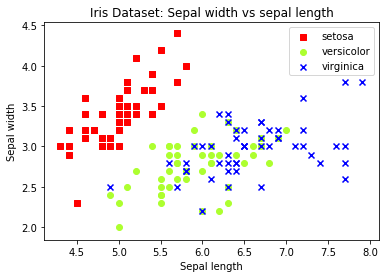

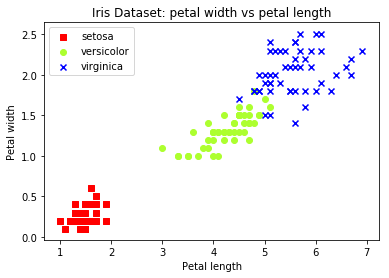

In [6]:
plt.figure('sepal')
colormarkers = [ ['red','s'], ['greenyellow','o'], ['blue','x']]
for i in range(len(colormarkers)):
    px = X_iris[:, 0][y_iris == i]
    py = X_iris[:, 1][y_iris == i]
    plt.scatter(px, py, c=colormarkers[i][0], marker=colormarkers[i][1])

plt.title('Iris Dataset: Sepal width vs sepal length')
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.figure('petal')

for i in range(len(colormarkers)):
    px = X_iris[:, 2][y_iris == i]
    py = X_iris[:, 3][y_iris == i]
    plt.scatter(px, py, c=colormarkers[i][0], marker=colormarkers[i][1])

plt.title('Iris Dataset: petal width vs petal length')
plt.legend(iris.target_names)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

## Aprendizaje supervisado: Classification

### El proceso típico de clasificación implica  los siguientes pasos:
- selección sus atributos,
- construir un modelo basado en los datos disponibles
- evaluar el rendimiento de su modelo en datos previamente no vistos.

### Para ello, antes de construir nuestro modelo debemos separar los datos de entrenamiento y prueba. Los datos de entrenamiento serán usados para construir el modelo, y los datos de la prueba serán usados para evaluar su funcionamiento.

### Separar datos entrenamiento de datos de prueba

### Nuestro primer paso será separar el conjunto de datos en conjuntos separados, usando el 75% de las instancias para entrenar a nuestro clasificador y el 25% restante para evaluarlo (y, en este caso, tomando sólo dos características, el ancho y la longitud del sepal)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Crear dataset con sólo los primeros 2 atributos(ancho y alto sepalo)
X, y = X_iris[:, [0,1]], y_iris

# Datos det Test se toman como el 25% de los datos de forma random
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
    
# Standarize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Mostrar los datos de entrenamiento

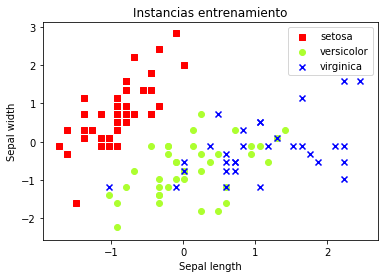

In [8]:
colormarkers = [ ['red','s'], ['greenyellow','o'], ['blue','x']]
plt.figure('Training Data')
for i in range(len(colormarkers)):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colormarkers[i][0], marker=colormarkers[i][1])

plt.title('Instancias entrenamiento')
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

### Mostrar los datos de test

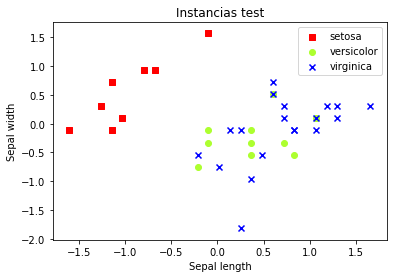

In [9]:
colormarkers = [ ['red','s'], ['greenyellow','o'], ['blue','x']]
plt.figure('Test Data')
for i in range(len(colormarkers)):
    xs = X_test[:, 0][y_test == i]
    ys = X_test[:, 1][y_test == i]
    plt.scatter(xs, ys, c=colormarkers[i][0], marker=colormarkers[i][1])

plt.title('Instancias test')
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

### Clasificador binario

### Para comenzar, vamos a transformar el problema en una tarea de clasificación binaria: solo queremos distinguir las setosas del resto.

In [10]:
import copy 
y_train_setosa = copy.copy(y_train) 
# Every 1 and 2 classes in the training set will became just 1
y_train_setosa[y_train_setosa > 0]=1
y_test_setosa = copy.copy(y_test)
y_test_setosa[y_test_setosa > 0]=1

print ('New training target classes:\n{0}'.format(y_train_setosa))

New training target classes:
[1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1
 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1
 0]



### Los modelos de clasificación lineal han sido muy bien estudiados a través de muchos años, y son muchos métodos diferentes con enfoques muy diferentes para construir el hiperplano de separación. Utilizaremos el `SGDClassifier` de scikit-learn para implementar un modelo lineal, incluyendo la regularización. El clasificador (en realidad, una familia de clasificadores, como veremos) recibe su nombre de usar el Descenso de Gradación Estocástico, un procedimiento numérico muy efectivo para encontrar el mínimo local de una función.

### Gradient Descent fue introducido por Louis Augustin Cauchy en 1847, para resolver un sistema de ecuaciones lineales. La idea se basa en la observación de que una función multivariable disminuye más rápidamente en la dirección de su gradiente negativo (se puede pensar en el gradiente como una generalización de la derivada para varias dimensiones). Si queremos encontrar su mínimo (al menos uno local) podríamos moverse en la dirección de su gradiente negativo. Esto es exactamente lo que hace el descenso gradiente.

### Cada clasificador en scikit-learn se crea de la misma manera: llamando a un método con los parámetros configurables del clasificador para crear una instancia del clasificador. En este caso, usaremos `linear_model.SGDClassifier`

In [11]:
from sklearn import linear_model 
clf = linear_model.SGDClassifier(random_state=33)
print (clf)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=33, shuffle=True, verbose=0,
       warm_start=False)


### Tenga en cuenta que el clasificador incluye varios parámetros. Por lo general, scikit-learn especifica los valores por defecto para cada parámetro. Pero tenga en cuenta que no es una buena idea mantenerlo con sus valores predeterminados,sobretodo si queremos encontrar la solución óptima.
### Ahora, simplemente llamamos al método de ajuste para entrenar al clasificador (es decir, construir un modelo que usaremos más adelante), basado en los datos de entrenamiento disponibles.

In [12]:
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=33, shuffle=True, verbose=0,
       warm_start=False)

### Construyendo un clasificador lineal,  podemos mostrar sus coeficientes:

In [13]:
print (clf.coef_,clf.intercept_)

[[-27.81699134  20.49537864]
 [ -7.45335653 -13.5666809 ]
 [ 19.25894089  -3.31899158]] [-17.86271109  -2.1444712  -10.45762617]


### Seperamos conjuntos de datos mediante una línea recta

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:3316: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


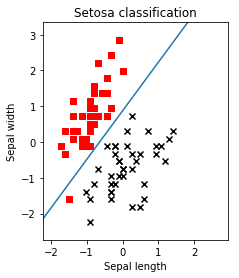

In [14]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min, x_max, 0.5)
fig,axes = plt.subplots()
axes.set_aspect('equal')
axes.set_title('Setosa classification')
axes.set_xlabel('Sepal length')
axes.set_ylabel('Sepal width')
axes.set_xlim(x_min, x_max)
axes.set_ylim(y_min, y_max)
plt.sca(axes)
plt.scatter(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], c='red', marker='s')
plt.scatter(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], c='black', marker='x')
ys = (-clf.intercept_[0]- xs * clf.coef_[0, 0]) / clf.coef_[0, 1]
plt.plot(xs, ys, hold=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:3316: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


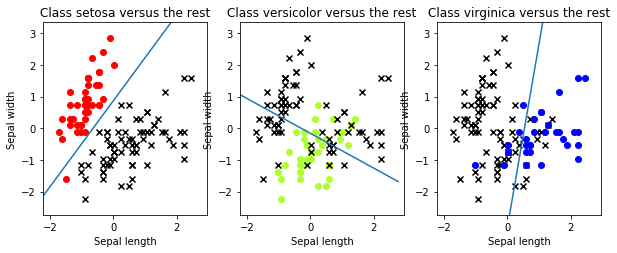

In [15]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min,x_max,0.5)
fig, axes = plt.subplots(1,3)
fig.set_size_inches(10,6)
for i in [0,1,2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ iris.target_names[i] + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    ys=(-clf.intercept_[i]-xs*clf.coef_[i,0])/clf.coef_[i,1]
    plt.plot(xs,ys,hold=True)    
    for j in [0,1,2]:
        px = X_train[:, 0][y_train == j]
        py = X_train[:, 1][y_train == j]
        color = colormarkers[j][0] if j==i else 'black'
        marker = 'o' if j==i else 'x'
        plt.scatter(px, py, c=color, marker=marker)     

plt.show()

### Predicción

### Ahora, la parte realmente útil: cuando tenemos una nueva flor, sólo tenemos que obtener su ancho y longitud del sépalo y llamar al método predict del clasificador en la nueva instancia.

In [16]:
print ('If the flower has 4.7 petal width and 3.1 petal length is a {}'.format(
        iris.target_names[clf.predict(scaler.transform([[1,4]]))]))

If the flower has 4.7 petal width and 3.1 petal length is a ['setosa']


In [17]:
print ('If the flower has 4.7 petal width and 3.1 petal length is a {}'.format(
        iris.target_names[clf.predict(scaler.transform([[4.7, 3.1]]))]))

If the flower has 4.7 petal width and 3.1 petal length is a ['setosa']


### Evaluando el clasificador

### El desempeño de un estimador es una medida de su efectividad. La medida de rendimiento se llama _accuracy_: dado un clasificador y un conjunto de instancias, simplemente mide la proporción de instancias correctamente clasificadas por el clasificador. Podemos, por ejemplo, usar las instancias en el conjunto de entrenamiento y calcular la precisión de nuestro clasificador al predecir sus clases objetivo. Scikit-learn incluye un módulo `metrics` que implementa métricas de rendimiento.

In [18]:
from sklearn import metrics
y_train_pred = clf.predict(X_train)
print ('Accuracy on the training set:{:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))

Accuracy on the training set:0.86


### Esto significa que nuestro clasificador predice correctamente el 86 % de las instancias del conjunto de entrenamiento. Pero esto es realmente una mala idea. El problema con la evaluación en el conjunto de entrenamiento es que usted ha construido su modelo usando estos datos, y es posible que su modelo se ajuste realmente muy bien a ellos, pero tiene un desempeño pobre en datos previamente no vistos (que es su propósito final). Este fenómeno se llama sobreentrenamiento.

### ¿Recuerdas que separamos una porción del conjunto de entrenamiento? Ahora es el momento de usarlo: ya que no se utilizó para el entrenamiento, esperamos que nos dé y idead de qué tan bien nuestro clasificador realiza en datos previamente no vistos.

In [19]:
y_pred = clf.predict(X_test)
print ('Accuracy on the training set:{:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))

Accuracy on the training set:0.66


### Por lo general, la precisión en el conjunto de pruebas es menor que la precisión en el conjunto de entrenamiento, ya que el modelo está modelando el conjunto de entrenamiento, no el conjunto de pruebas.

### Una herramienta muy útil cuando se enfrenta a problemas de varias clases es la matriz de confusión. Esta matriz incluye, en la fila i y la columna j el número de instancias de la clase _i_ que se predijo estar en la clase _j_. Un buen clasificador acumulará los valores en la matriz de confusión diagonal, donde pertenecen las instancias correctamente clasificadas. Teniendo las clases originales y predichas, podemos imprimir fácilmente la matriz de confusión:

In [20]:
print (metrics.confusion_matrix(y_test, y_pred))

[[ 8  0  0]
 [ 0  5  6]
 [ 0  7 12]]


###### Para leer la matriz de clasificación, sólo recuerde la definición: el "6" en la fila 2, columna 3, significa que 6 instancias de la clase 1(versicolor) se predijeron estar en la clase 2(virginica).

### La precisión en el conjunto de pruebas es una buena medida de rendimiento cuando el número de instancias de cada clase es similar, es decir, tenemos una distribución uniforme de clases.

### Dentro de scikit-learn, hay varias funciones de evaluación; Vamos a mostrar tres populares: precisión, recuerdo, y F1-score (o f-measure).

In [21]:
print (metrics.classification_report(y_test, y_pred, target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       0.42      0.45      0.43        11
  virginica       0.67      0.63      0.65        19

avg / total       0.66      0.66      0.66        38



### - Precision calcula la proporción de instancias predichas como positivas que fueron evaluadas correctamente (mide cómo es correcto nuestro clasificador cuando dice que una instancia es positiva).
### - Recall cuenta la proporción de instancias positivas que fueron evaluadas correctamente (midiendo lo correcto que es nuestro clasificador cuando se enfrenta a una instancia positiva).
### - F1-score es la media armónica de precisión y memoria, e intenta combinar ambos en un solo número.

### Usando los cuatro atributos

### Para terminar con esta sección de clasificación, repetiremos todo el proceso, esta vez usando los cuatro atributos originales, y verificamos si el rendimiento mejora.

In [24]:
# El conjunto de pruebas será el 25% tomado al azar
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.25, random_state=33)
    
# Estandarizar las features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Construir el clasificador
clf = linear_model.SGDClassifier(loss='log', random_state=33)
clf.fit(X_train, y_train) 

# Evaluar el clasificador en el conjunto de evaluación
y_pred = clf.predict(X_test)
print (metrics.classification_report(y_test, y_pred, target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       0.78      0.64      0.70        11
  virginica       0.81      0.89      0.85        19

avg / total       0.84      0.84      0.84        38



## Aprendizaje no supervidado: Clustering

### A veces, es posible tomar un conjunto de entrenamiento no etiquetado y tratar de encontrar una estructura o patrones ocultos en los datos: no hay ninguna clase de destino para predecir o evaluar el modelo resultante. Por ejemplo, los métodos clustering intentan agrupar instancias en subconjuntos (denominados clusters): una instancia debe ser similar a otra en el mismo subconjunto y diferente de las pertenecientes a otro subconjunto.

### En esta sección, realizaremos la agrupación del conjunto de datos de Iris, para ver si podríamos agrupar instancias utilizando su ancho y longitud de pétalo y sepal. El conjunto de entrenamiento es el mismo que utilizamos para nuestro último ejemplo de clasificación supervisada.

### K-means es probablemente el algoritmo de agrupamiento más conicido, porque es muy simple y fácil de implementar, y ha demostrado un buen desempeño en diferentes tareas. Pertenece a la clase de algoritmos de partición que simultáneamente dividen los puntos de datos en grupos distintos, llamados clusters. Aplicaremos k-means a los datos de entrenamiento, usando solo dimensiones de sepal, construyendo 3 clusters

In [ ]:
from sklearn import cluster
clf_sepal = cluster.KMeans(init='k-means++', n_clusters=3, random_state=33)
clf_sepal.fit(X_train4[:,0:2])


### Podemos mostrar la etiqueta asignada para cada instancia (tenga en cuenta que esta etiqueta es un nombre de clúster, no tiene nada que ver con nuestras clases de destino).

In [ ]:
print (clf_sepal.labels_)

### Usando las capacidades de indexación de NumPy, podemos mostrar las clases de destino reales para cada cluster, solo para comparar los clusters construidos con nuestras clases de flor

In [ ]:
print (y_train4[clf_sepal.labels_==0])

In [ ]:
print (y_train4[clf_sepal.labels_==1])

In [ ]:
print (y_train4[clf_sepal.labels_==2])

### Podemos mostrar nuestras instancias y los clústeres a los que pertenecen, para tener una primera aproximación de lo bien que se está comportando nuestro algoritmo con nuestros datos:

In [ ]:
colormarkers = [ ['red','s'], ['greenyellow','o'], ['blue','x']]
step = .01 
margin = .1   
sl_min, sl_max = X_train4[:, 0].min()-margin, X_train4[:, 0].max() + margin
sw_min, sw_max = X_train4[:, 1].min()-margin, X_train4[:, 1].max() + margin
sl, sw  = np.meshgrid(
    np.arange(sl_min, sl_max, step),
np.arange(sw_min, sw_max, step)
    )
Zs = clf_sepal.predict(np.c_[sl.ravel(), sw.ravel()]).reshape(sl.shape)
centroids_s = clf_sepal.cluster_centers_


### Mostrar los puntos de datos y las regiones calculadas

In [ ]:
plt.figure(1)
plt.clf()
plt.imshow(Zs, interpolation='nearest', extent=(sl.min(), sl.max(), sw.min(), sw.max()), cmap= plt.cm.Pastel1, aspect='auto', origin='lower')
for j in [0,1,2]:
    px = X_train4[:, 0][y_train == j]
    py = X_train4[:, 1][y_train == j]
    plt.scatter(px, py, c=colormarkers[j][0], marker= colormarkers[j][1])
plt.scatter(centroids_s[:, 0], centroids_s[:, 1],marker='*',linewidths=3, color='black', zorder=10)
plt.title('K-means clustering on the Iris dataset using Sepal dimensions\nCentroids are marked with stars')
plt.xlim(sl_min, sl_max)
plt.ylim(sw_min, sw_max)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

### Repetir el experimento usando las dimensiones del pétalo

In [ ]:
clf_petal = cluster.KMeans(init='k-means++', n_clusters=3, random_state=33)
clf_petal.fit(X_train4[:,2:4])


In [ ]:
print (y_train4[clf_petal.labels_==0])

In [ ]:
print (y_train4[clf_petal.labels_==1])

In [ ]:
print (y_train4[clf_petal.labels_==2])

### Pintar los clusters 

In [ ]:
colormarkers = [ ['red','s'], ['greenyellow','o'], ['blue','x']]
step = .01 
margin = .1
sl_min, sl_max = X_train4[:, 2].min()-margin, X_train4[:, 2].max() + margin
sw_min, sw_max = X_train4[:, 3].min()-margin, X_train4[:, 3].max() + margin
sl, sw  = np.meshgrid(
    np.arange(sl_min, sl_max, step),
    np.arange(sw_min, sw_max, step), 
    )
Zs = clf_petal.predict(np.c_[sl.ravel(), sw.ravel()]).reshape(sl.shape)
centroids_s = clf_petal.cluster_centers_
plt.figure(1)
plt.clf()
plt.imshow(Zs, interpolation='nearest', extent=(sl.min(), sl.max(), sw.min(), sw.max()), cmap= plt.cm.Pastel1, aspect='auto', origin='lower')
for j in [0,1,2]:
    px = X_train4[:, 2][y_train4 == j]
    py = X_train4[:, 3][y_train4 == j]
    plt.scatter(px, py, c=colormarkers[j][0], marker= colormarkers[j][1])
plt.scatter(centroids_s[:, 0], centroids_s[:, 1],marker='*',linewidths=3, color='black', zorder=10)
plt.title('K-means clustering on the Iris dataset using Petal dimensions\nCentroids are marked with stars')
plt.xlim(sl_min, sl_max)
plt.ylim(sw_min, sw_max)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()

### Calcular los clusters usando los 4 atributos

In [ ]:
clf = cluster.KMeans(init='k-means++', n_clusters=3, random_state=33)
clf.fit(X_train4)


In [ ]:
print (y_train[clf.labels_==0])

In [ ]:
print (y_train[clf.labels_==1])

In [ ]:
print (y_train[clf.labels_==2])

### Medir precisión sobre el conjunto de pruebas utilizando todos los atributos

In [ ]:
y_pred=clf.predict(X_test4)
print (metrics.classification_report(y_test, y_pred, target_names=['setosa','versicolor','virginica']))

### Medir precisión sobre el conjunto de pruebas utilizando sólo medidas de pétalos

In [ ]:
y_pred_petal=clf_petal.predict(X_test4[:,2:4])
print (metrics.classification_report(y_test, y_pred_petal, target_names=['setosa','versicolor','virginica']))

### Vemos que utilizando sólo 2 atibutos obtenemos mejores resultados. Aunque a primera vista esto parece contradictorio, veremos que seleccionando un subconjunto de características mediante un proceso llamado selección de características, podría mejorar el rendimiento de nuestros algoritmos,seleccionando aquellas mejores features

## Resumen

### Resumiremos los principales pasos para aplicar un método de aprendizaje supervisado en scikit-learn:
- Obtener su conjunto de datos. Seleccione sus características de aprendizaje y cree una matriz de datos 2D, con una columna para cada característica y una fila para cada instancia de aprendizaje. Cada característica está representada por un número real. Es probable que sus datos no se vean así en su formato original.
- Crear una instancia de un estimador (un clasificador o un regresor). En scikit-learn, esto corresponde a un objeto que implementa los métodos `fit (X, y)` y `predict (T)`. Este estimador toma como argumentos los parámetros del modelo. Puede configurar estos parámetros manualmente o utilizar herramientas para la selección de modelos
- Separar los conjuntos de entrenamiento y pruebas (o, alternativamente, usar la validación cruzada)
- Construya el modelo usando el método `fit (X, y)`, siendo X sus datos de entrenamiento, y la clase de destino correspondiente.
- Evaluar estimador en los datos de prueba, utilizando el método `predict (T)`, siendo T su conjunto de datos de prueba.
- Compare sus resultados con las clases de destino originales, utilizando una de las varias medidas del módulo de métricas.

### Los pasos anteriores son sólo una visión general: scikit-learn ofrece varios métodos adicionales que implementan diferentes operaciones de aprendizaje de máquina (como reducción de dimensionalidad, agrupación o aprendizaje semi-supervisado) y muchos métodos de transformación de conjuntos de datos.
